###  Created by Luis A. Sanchez-Perez (alejand@umich.edu).
<p><span style="color:green"><b>Copyright &#169;</b> Do not distribute or use without authorization from author.</span></p>

In [1]:
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import numpy as np
from training import *
from optimizers import *

### 1. Read a prepares dataset for training
In this section we read the dataset and binarize the problem, meaning we take all observations from one class as the positive observations and consider the rest negative observations.

In [2]:
# Load dataset
iris = datasets.load_iris()
print(iris.feature_names, end="\n")
print(iris.target_names)
# Binarize the problem
y = iris.target
y[y != 1] =  0
# Defines optimizer
optimizer = NewtonsMethodOptimizer()

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


### 2. Two features and linear boundary
In this section we select only two features from the four available and try to fit a logistic regression model. We do not use any polynomial term so the result is a linear boundary. Clearly there is no perfect linear separatation between both classes based only on these two features.

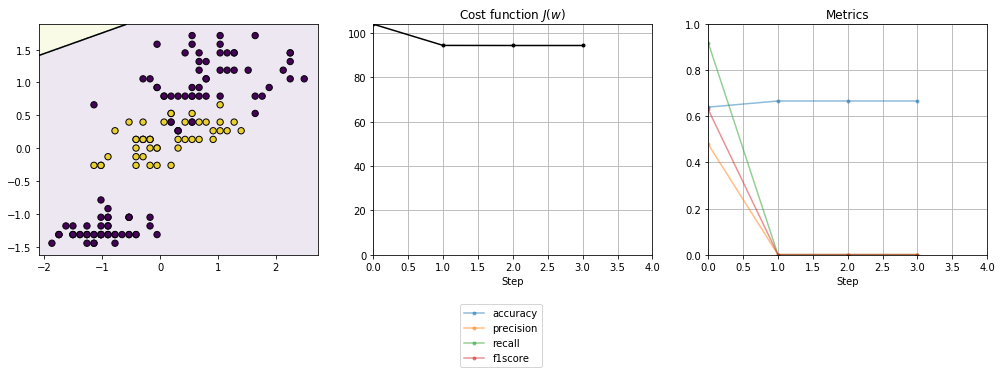

In [3]:
# Selects training data
features = [0,3]
X = iris.data[:,features]
# Applies transformations to the training data
ps = PolynomialFeatures(degree=1)
ps.fit(X)
X = ps.transform(X)
sc = StandardScaler()
sc.fit(X[:,1:])
X[:,1:] = sc.transform(X[:,1:])
# Trains logistic regression model
point = 1e-4 * np.random.randn(X.shape[1],)
log = train(X, y, point, optimizer, epochs=200)
# Shows training animation
TrainingAnimation2D(log, X, y, polynomial=ps, scaler=sc).start()

### 3. Two features and non-linear boundary
Here we use the same two features and in the previous section but now performing a polynomial expansion adding second order terms.

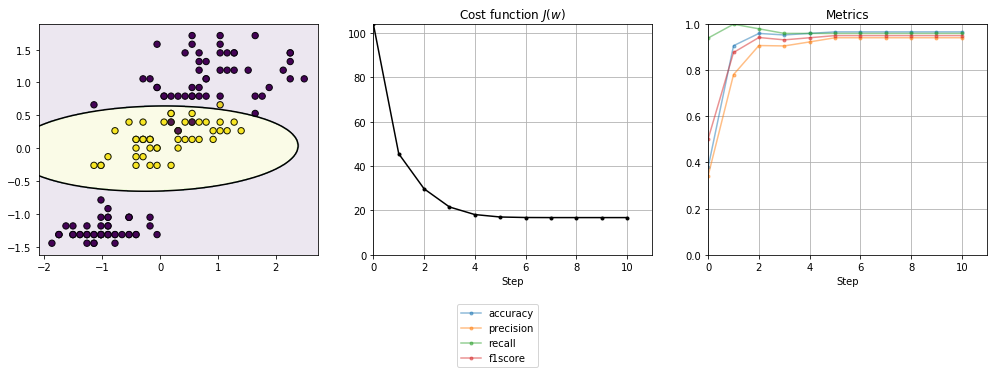

In [4]:
# Selects training data
features = [0,3]
X = iris.data[:,features]
# Applies transformations to the training data
ps = PolynomialFeatures(degree=2)
ps.fit(X)
X = ps.transform(X)
sc = StandardScaler()
sc.fit(X[:,1:])
X[:,1:] = sc.transform(X[:,1:])
# Trains logistic regression model
point = 1e-4 * np.random.randn(X.shape[1],)
log = train(X, y, point, optimizer, epochs=200)
# Shows training animation
TrainingAnimation2D(log, X, y, polynomial=ps, scaler=sc).start()

### 4. Two features but a more complex non-linear boundary
Here we use the same two features and in the previous section but now performing a polynomial expansion adding polynomial terms up to seventh order. You can start seeing really complex boundaries.

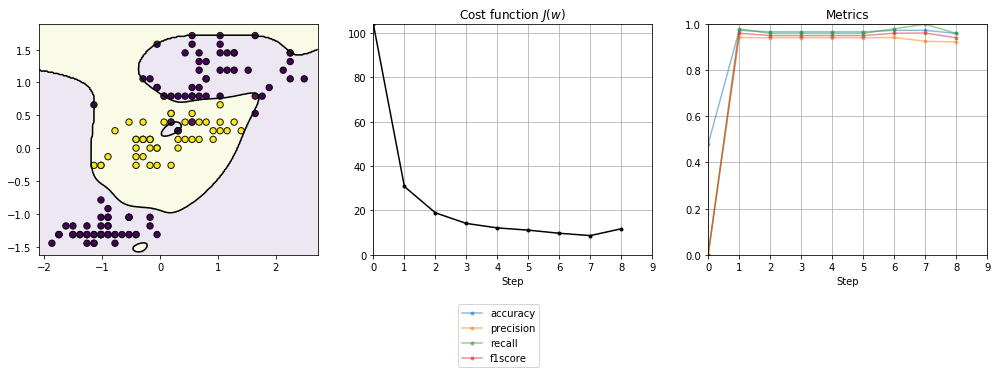

In [5]:
# Selects training data
features = [0,3]
X = iris.data[:,features]
# Applies transformations to the training data
ps = PolynomialFeatures(degree=7)
ps.fit(X)
X = ps.transform(X)
sc = StandardScaler()
sc.fit(X[:,1:])
X[:,1:] = sc.transform(X[:,1:])
# Trains logistic regression model
point = 1e-4 * np.random.randn(X.shape[1],)
log = train(X, y, point, optimizer, epochs=200)
# Shows training animation
TrainingAnimation2D(log, X, y, polynomial=ps, scaler=sc).start()